In [3]:
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as st

In [18]:
heights = pd.read_table('data/heights.dat')
heights

,Height
0,156
1,163
2,169
3,161
4,154
...,...
346,159
347,170
348,160
349,152


In [20]:
mean = heights['Height'].mean()

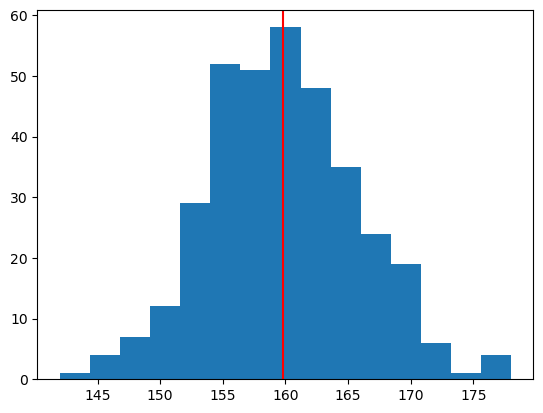

In [21]:
plt.hist(heights, bins=15)
plt.axvline(mean, color='r')
plt.show()

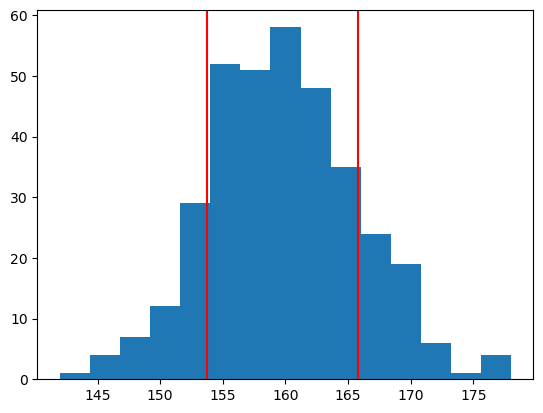

In [24]:
plt.hist(heights, bins=15)
plt.axvline(mean + heights.std().values[0], color='r')
plt.axvline(mean - heights.std().values[0], color='r')
plt.show()

To calculate confidence intervals, we need to calculate **Z-scores** $$Z = \frac{x - \mu}{\sigma}$$ where $Z  \thicksim N(0;1)$
This result in standartization

In [34]:
def get_real_confidence_intervals(prob, mean, std):
    lower_area = (1 - prob) / 2
    upper_area = (1 + prob) / 2
    return [
        norm.ppf(lower_area, mean, std),
        norm.ppf(upper_area, mean, std)
    ]

In [41]:
get_real_confidence_intervals(0.9975, 0, 1)

[-3.023341439739154, 3.023341439739154]

In [46]:
std_dev = heights['Height'].std()
conf_int = get_real_confidence_intervals(0.95, mean, std_dev)

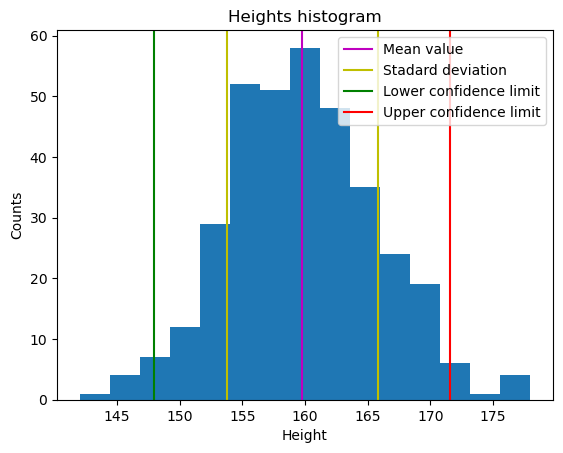

In [50]:
plt.hist(heights, bins=15)
plt.axvline(mean, color='m', label='Mean value')
plt.axvline(mean + heights.std().values[0], color='y', label='Stadard deviation')
plt.axvline(mean - heights.std().values[0], color='y')
plt.axvline(conf_int[0], color='g', label='Lower confidence limit')
plt.axvline(conf_int[1], color='r', label='Upper confidence limit')
plt.title("Heights histogram")
plt.xlabel('Height')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.show()

In [56]:
sample_data = norm.rvs(5, 10, 100) # returns 100 random values from a gaussian distribution with mean 5 and sigma 10

In [55]:
sample_data

array([  6.25673557,   8.21635389,  -9.90066361,  19.07803047,
         0.92353255,  15.93376146,  -0.64076573,  -8.48834764,
       -11.81821871,  24.7010491 , -11.96562094,   5.59277636,
        -9.22186031,  -8.44080166,  10.40460389,   2.73863104,
        -8.32386482,   4.70914474,  10.31035164,   3.80077167,
         2.60938582,  26.47652426,  12.44231018,  -3.82721416,
       -13.1817984 ,  15.58485723,  -4.33292397,  -1.39646787,
        29.17950428,  -2.03738998,  13.92376802,   5.93548421,
        16.91312462,  14.27014573,   8.71077547,  12.4102357 ,
         5.22301525,  18.36425037,  13.59026442,  16.84312694,
        -0.04798302,  14.10319021,  13.78953229,   3.39226053,
        -4.32682117,   8.82907953,  18.98489596,   9.519571  ,
        -3.28855391, -11.46642453,  -9.16133618,   2.70758563,
         6.33421121, -14.1128337 ,  10.58748629, -16.06083431,
        -7.97853379,   2.78698243,  22.46263671, -18.59078588,
         9.74261271,  -0.13469267,  21.29399263,  20.91

We assume:
$$H_0: \mu_{\text{sample}} = 2$$
$$H_!: \mu_{\text{sample}} \neq 2$$
We ask:
```python
st.ttest_1samp(sample_data, 2)
```
We get:
pvalue=0.0005257593184875585
We analyze that the small p-value indicates that the observed data is highly inconsistent with the null hypothesis. Therefore, we conclude that it is unlikely the true mean of the population is 2. Instead, the data suggests that the true mean is different from 2. Since the p-value is much smaller than a typical significance level (e.g., 0.05 or 0.01), we reject the null hypothesis. This means that based on the sample data, it is highly unlikely that the true mean of the population from which this sample was drawn is 2.

In [71]:
st.ttest_1samp(sample_data, 2)

TtestResult(statistic=3.5847547001698694, pvalue=0.0005257593184875585, df=99)

In [69]:
sample_data.mean()

4.871742343126785

In [72]:
grain_data = pd.read_table('data/grain_data.dat')

In [73]:
grain_data

,Year,GreatNorthern,BigFour
0,1912,71.0,54.7
1,1913,73.9,60.6
2,1914,48.9,45.1
3,1915,78.9,71.0
4,1916,43.5,40.9
5,1917,47.9,45.4
6,1918,63.0,53.4
7,1919,48.4,41.2
8,1920,48.1,44.8


Comparing the means of two separate distributions. Creating the hypoteses: 
$$
H_0: pvalue \leq 0.05
$$
$$
H_1: pvalue \geq 0.05
$$


In [74]:
st.ttest_ind(grain_data.GreatNorthern, grain_data.BigFour)

TtestResult(statistic=1.312336706487564, pvalue=0.20792200785311768, df=16.0)

Since the $pvalue \geq 0.05$ we cannot reject the $H_0$ hypothesis

In [77]:
water_data = pd.read_table('data/water_data.dat')
water_data

,bottom,surface
0,0.430,0.415
1,0.266,0.238
2,0.567,0.390
3,0.531,0.410
4,0.707,0.605
5,0.716,0.609
6,0.651,0.632
7,0.589,0.523
8,0.469,0.411
9,0.723,0.612


If the samples are from one object we can use:

In [78]:
st.ttest_rel(water_data.bottom, water_data.surface)

TtestResult(statistic=4.863812745135183, pvalue=0.0008911154578225479, df=9)